# Lecture 2 

- the mean is the minimizer of the variance
- the median is the minimizer of the standard deviation


- if you decide on the model it's statistics
- if you don't have the model it's machine learning


- Median is a better representation of the population
    - Better for representing populations with extreme values

In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [20]:
y = np.array([22, 10, 9, 18])

In [18]:
np.mean(y)

14.75

In [19]:
np.median(y)

14.0

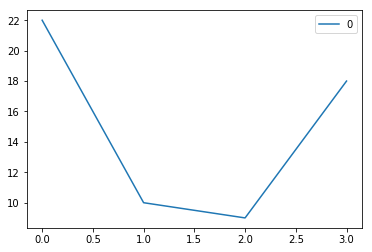

In [27]:
pd.DataFrame(y).plot()

## Linear Regression

Pearson Correlation
- Correlation is made for a linear model
- When you have a non-linear model correlation doesn't make any sense

- y: output variable
- x: input variable(s)

- Regression: y is continuuous
- Classification: y is discrete

Problem: Suppose we have a fixed budget of advertisement to increase sales

How do you distribute advertisement budget between different advertisement methods?
- Featurize & Predict
- Plot sales vs advertisement money put into each medium (TV, Radio, Newspaper...)

In [43]:
advertising = pd.read_csv(r"C:\Users\olive\Documents\GitHub\Computational-Applied-Statistics\Week 2\Advertising.csv", 
                          index_col=0)

In [44]:
advertising.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [48]:
len(advertising)

200

In [45]:
np.mean(advertising['sales'])

14.022500000000003

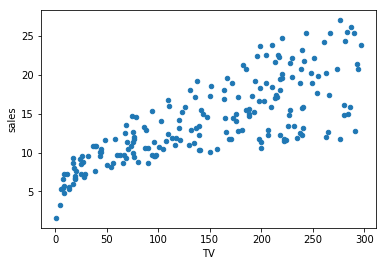

In [49]:
advertising.plot.scatter(x='TV', y='sales')

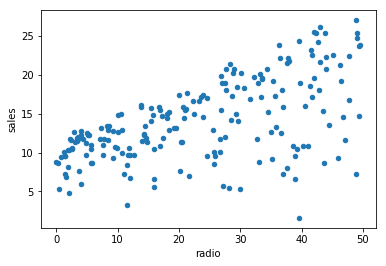

In [53]:
advertising.plot.scatter(x='radio', y='sales')

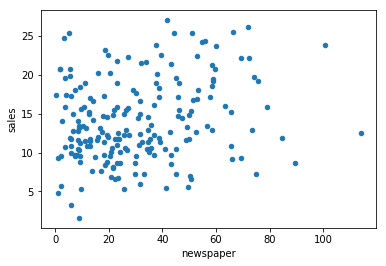

In [52]:
advertising.plot.scatter(x='newspaper', y='sales')

### "If you don't have enough data any noise looks like a pattern"

## Linear Regression Example

In [57]:
from sklearn.linear_model import LinearRegression

In [58]:
model = LinearRegression()

In [59]:
model.fit(X=advertising[['TV']], y=advertising['sales'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [60]:
model.predict(150)

array([14.16308961])

In [63]:
model.intercept_, model.coef_[0]

(7.032593549127693, 0.047536640433019764)

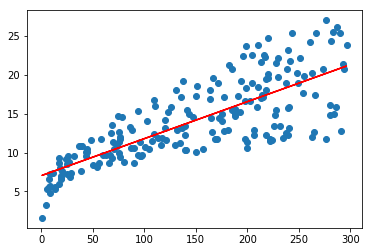

In [76]:
plt.scatter(advertising['TV'], advertising['sales'])
plt.plot(advertising['TV'], model.coef_*advertising['TV'] + model.intercept_, color='r')

## Linear Regression Example: Subset of Data

In [80]:
model_subset = LinearRegression()

In [82]:
X_subset = advertising[['TV']][0:4]
y_subset = advertising['sales'][0:4]

In [83]:
model_subset.fit(X=X_subset, y=y_subset)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

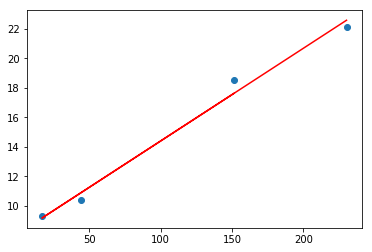

In [85]:
plt.scatter(X_subset, y_subset)
plt.plot(X_subset, model_subset.coef_*X_subset + model_subset.intercept_, color='r')

In [87]:
advertising.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [88]:
advertising.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
TV           200 non-null float64
radio        200 non-null float64
newspaper    200 non-null float64
sales        200 non-null float64
dtypes: float64(4)
memory usage: 7.8 KB


In [89]:
advertising.values

array([[230.1,  37.8,  69.2,  22.1],
       [ 44.5,  39.3,  45.1,  10.4],
       [ 17.2,  45.9,  69.3,   9.3],
       [151.5,  41.3,  58.5,  18.5],
       [180.8,  10.8,  58.4,  12.9],
       [  8.7,  48.9,  75. ,   7.2],
       [ 57.5,  32.8,  23.5,  11.8],
       [120.2,  19.6,  11.6,  13.2],
       [  8.6,   2.1,   1. ,   4.8],
       [199.8,   2.6,  21.2,  10.6],
       [ 66.1,   5.8,  24.2,   8.6],
       [214.7,  24. ,   4. ,  17.4],
       [ 23.8,  35.1,  65.9,   9.2],
       [ 97.5,   7.6,   7.2,   9.7],
       [204.1,  32.9,  46. ,  19. ],
       [195.4,  47.7,  52.9,  22.4],
       [ 67.8,  36.6, 114. ,  12.5],
       [281.4,  39.6,  55.8,  24.4],
       [ 69.2,  20.5,  18.3,  11.3],
       [147.3,  23.9,  19.1,  14.6],
       [218.4,  27.7,  53.4,  18. ],
       [237.4,   5.1,  23.5,  12.5],
       [ 13.2,  15.9,  49.6,   5.6],
       [228.3,  16.9,  26.2,  15.5],
       [ 62.3,  12.6,  18.3,   9.7],
       [262.9,   3.5,  19.5,  12. ],
       [142.9,  29.3,  12.6,  15. ],
 

### Use .values to dataframe before sending it for fitting - try this at work and compare training times

- Numpy array of df.values should be faster to train than just df (validate this in python)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002BD7F9203C8>,
      dtype=object)

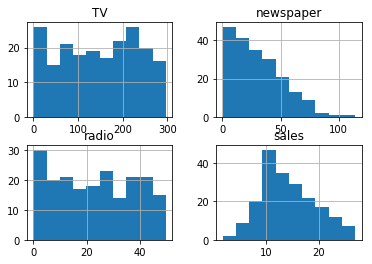

In [92]:
advertising.hist()

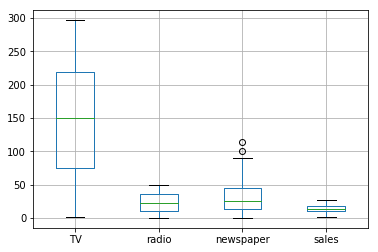

In [93]:
advertising.boxplot()